In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
import pickle
import joblib

In [2]:
# Load training data
df = pd.read_csv("train.csv")
df['datetime'] = pd.to_datetime(df['datetime'])

In [3]:
# Feature engineering
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['dayofweek'] = df['datetime'].dt.dayofweek


In [4]:
# Drop unnecessary columns
df.drop(['casual', 'registered'], axis=1, inplace=True)

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1,2011,5


In [6]:
df.to_csv('data.csv',index=False)

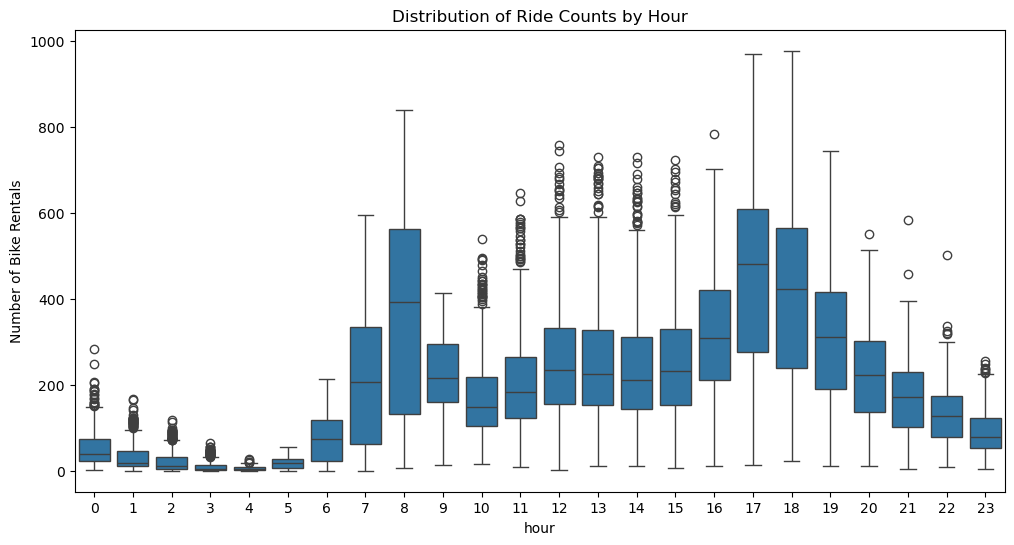

In [7]:
# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hour', y='count')
plt.ylabel("Number of Bike Rentals")
plt.title('Distribution of Ride Counts by Hour')
plt.show()

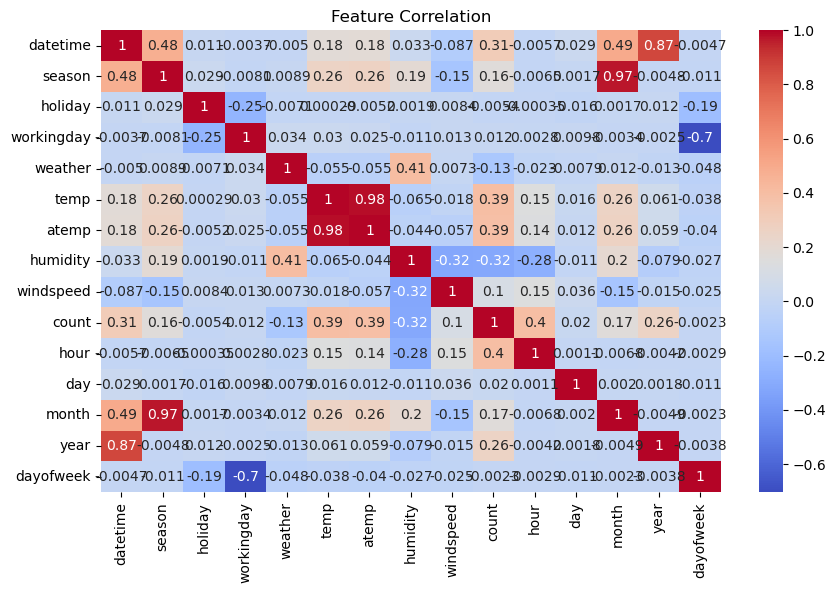

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [9]:
X = df[['season', 'hour', 'holiday', 'month', "workingday", "dayofweek", 'temp', 'humidity', 'windspeed', 'weather']]
y = df["count"]


In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [11]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)
preds = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"Random Forest RMSE: {rmse}")

Random Forest RMSE: 64.10610864409638


In [12]:
y_test

212       1
4114    126
4087     64
8349     92
1958    382
       ... 
2826    275
6812      4
6281     82
1024      1
2094      5
Name: count, Length: 2178, dtype: int64

In [13]:
preds

array([  2.62, 163.07, 108.19, ...,  78.74,  10.37,  13.12])

In [129]:
filename = 'random_forest.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf, file)